In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import dask 
import pandas as pd
import xrft 
# import seawater as sw
from scipy.interpolate import griddata
from matplotlib import ticker

import pyspec

import os.path as op

from dask.diagnostics import ProgressBar
from scipy.ndimage import gaussian_filter as gauss



In [2]:
#Por ser nao-equidistante as coordenadas tem duas dimensoes, isso e incomum e por isso que o pacote nao reconhece as coordenacas como validas

In [16]:
xmon=2

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[-9:])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt)


In [17]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [57]:
'Teste'

af = 0.5*(varf.U10[0,:,0:200]**2 + varf.V10[0,:,0:200]**2).compute()
at = 0.5*(vart.U10[0,:,0:200]**2 + vart.V10[0,:,0:200]**2).compute()
varr='wind_KE'

dxx=0.013*111e3
dyy=0.013*111e3


In [58]:
dxx=0.013*111e3
dyy=0.013*111e3


#af = varf.SST[:,:,0:200]
#at = vart.SST[:,:,0:200]
#varr='SST'

#
#af = 0.5*(varf.UOCE[:,:,0:200]**2 + varf.VOCE[:,:,0:200]**2)
#at = 0.5*(vart.UOCE[:,:,0:200]**2 + vart.VOCE[:,:,0:200]**2)
#varr='KE'

# af = 0.5*(varf.U10[:,:,0:200]**2 + varf.V10[:,:,0:200]**2)
# at = 0.5*(vart.U10[:,:,0:200]**2 + vart.V10[:,:,0:200]**2)
# varr='wind_KE'


In [60]:
af=af.drop(['nav_lon','nav_lat'])
at=at.drop(['nav_lon','nav_lat'])

In [61]:
at

<xarray.DataArray (y: 390, x: 200)>
array([[ 73.22247 ,  73.543304,  73.65589 , ...,  38.213474,  37.54155 ,
         36.734   ],
       [ 73.63524 ,  73.94749 ,  73.97743 , ...,  37.025414,  36.473274,
         35.747463],
       [ 73.932686,  74.07155 ,  74.13145 , ...,  35.54569 ,  34.986557,
         34.353344],
       ...,
       [ 81.99051 ,  82.105515,  82.25531 , ..., 140.1128  , 138.4136  ,
        136.429   ],
       [ 81.62526 ,  81.369675,  81.82937 , ..., 138.98428 , 136.98822 ,
        134.84642 ],
       [ 81.29822 ,  81.175385,  81.62198 , ..., 136.81055 , 134.61098 ,
        132.17935 ]], dtype=float32)
Coordinates:
    time_centered  datetime64[ns] 2011-11-01T12:00:00
    time_counter   datetime64[ns] 2011-11-01T12:00:00
Dimensions without coordinates: y, x

In [65]:
xl=np.arange(af[0,:].shape[0])
yl=np.arange(af[:,0].shape[0])
# xl,yl=np.meshgrid(xl,yl)
xl=xl*dxx;
yl=yl*dyy;

af=af.assign_coords(xx=(['x'],xl),yy=(['y'],yl))
at=at.assign_coords(xx=(['x'],xl),yy=(['y'],yl))




In [76]:
at.xx

<xarray.DataArray 'xx' (x: 200)>
array([     0.,   1443.,   2886.,   4329.,   5772.,   7215.,   8658.,
        10101.,  11544.,  12987.,  14430.,  15873.,  17316.,  18759.,
        20202.,  21645.,  23088.,  24531.,  25974.,  27417.,  28860.,
        30303.,  31746.,  33189.,  34632.,  36075.,  37518.,  38961.,
        40404.,  41847.,  43290.,  44733.,  46176.,  47619.,  49062.,
        50505.,  51948.,  53391.,  54834.,  56277.,  57720.,  59163.,
        60606.,  62049.,  63492.,  64935.,  66378.,  67821.,  69264.,
        70707.,  72150.,  73593.,  75036.,  76479.,  77922.,  79365.,
        80808.,  82251.,  83694.,  85137.,  86580.,  88023.,  89466.,
        90909.,  92352.,  93795.,  95238.,  96681.,  98124.,  99567.,
       101010., 102453., 103896., 105339., 106782., 108225., 109668.,
       111111., 112554., 113997., 115440., 116883., 118326., 119769.,
       121212., 122655., 124098., 125541., 126984., 128427., 129870.,
       131313., 132756., 134199., 135642., 137085., 138528., 139971.,
       141414., 142857., 144300., 145743., 147186., 148629., 150072.,
       151515., 152958., 154401., 155844., 157287., 158730., 160173.,
       161616., 163059., 164502., 165945., 167388., 168831., 170274.,
       171717., 173160., 174603., 176046., 177489., 178932., 180375.,
       181818., 183261., 184704., 186147., 187590., 189033., 190476.,
       191919., 193362., 194805., 196248., 197691., 199134., 200577.,
       202020., 203463., 204906., 206349., 207792., 209235., 210678.,
       212121., 213564., 215007., 216450., 217893., 219336., 220779.,
       222222., 223665., 225108., 226551., 227994., 229437., 230880.,
       232323., 233766., 235209., 236652., 238095., 239538., 240981.,
       242424., 243867., 245310., 246753., 248196., 249639., 251082.,
       252525., 253968., 255411., 256854., 258297., 259740., 261183.,
       262626., 264069., 265512., 266955., 268398., 269841., 271284.,
       272727., 274170., 275613., 277056., 278499., 279942., 281385.,
       282828., 284271., 285714., 287157.])
Coordinates:
    time_centered  datetime64[ns] 2011-11-01T12:00:00
    time_counter   datetime64[ns] 2011-11-01T12:00:00
    xx             (x) float64 0.0 1.443e+03 2.886e+03 ... 2.857e+05 2.872e+05
Dimensions without coordinates: x

In [78]:

# ispf=xrft.isotropic_powerspectrum(af.drop(['nav_lat','nav_lon']))
ispt=xrft.isotropic_powerspectrum(at.drop(['yy']),dims=('x','y'))


ValueError: The input array contains coordinate variable(s) (['xx']) whose dims include the transform dimension(s) `x`. Please drop these coordinates (`.drop(['xx']`) before invoking xrft.

In [58]:
# import warnings
# warnings.filterwarnings("ignore")
# '''
# XRFT
# '''




# '''
# Isotropic Spec
# '''

# #SPFULL=np.zeros([af.shape[0],af.shape[1],int(af.shape[2]/2+1)])
# #SPSMTH=np.zeros([at.shape[0],at.shape[1],int(at.shape[2]/2+1)])
# ISPFULL=np.zeros([af.shape[0],2,50])
# ISPSMTH=np.zeros([at.shape[0],2,50])


# for ix in range(af.shape[0]):


    
# #     spf = spec.TWODimensional_spec(af[ix,:,:],dxx,dyy)
# #     spt = spec.TWODimensional_spec(at[ix,:,:],dxx,dyy)


#     ispf=xrft.isotropic_powerspectrum(af[ix,:,:].drop(['nav_lat', 'nav_lon']))
#     ispt=xrft.isotropic_powerspectrum(at[ix,:,:].drop(['nav_lat', 'nav_lon']))


# #     ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
# #     ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

#     ISPFULL[ix,0,:]=np.array(ispf);
#     ISPFULL[ix,1,:]=ispf.freq_r;

#     ISPSMTH[ix,0,:]=np.array(ispt);
#     ISPSMTH[ix,1,:]=ispt.freq_r;



IndexError: too many indices

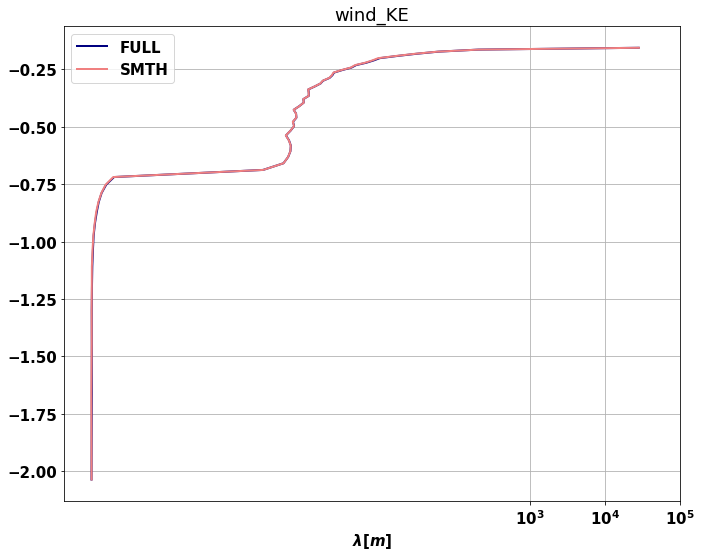

In [20]:



plt.figure(figsize=(10,8))


plt.plot(np.log10(np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')






# plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
#         np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

# plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
#         np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('{0}'.format(varr))

plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
# plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures_xmas/pyspec_mean_{0}.png'.format(varr))
# plt.close()
#